In [1]:
import torchvision.transforms as transforms
import os
import json
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageDraw, Image, ImageFont
from IPython.display import clear_output, HTML, display
import imageio as imio
from einops import rearrange

import sys
sys.path.append('..')
from datasets.dataset_utils import listdir_nohidden, normalize_trajectory, random_rotation_augment

In [2]:
def Rx(theta):
    return np.matrix([[ 1, 0           , 0           ],
                   [ 0, np.cos(theta),-np.sin(theta)],
                   [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
    return np.matrix([[ np.cos(theta), 0, np.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-np.sin(theta), 0, np.cos(theta)]])
  
def Rz(theta):
    return np.matrix([[ np.cos(theta), -np.sin(theta), 0 ],
                   [ np.sin(theta), np.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

In [322]:
resize_transform_rgb = transforms.Compose([transforms.Resize(64), transforms.ToTensor()])
resize_transform_depth = transforms.Compose([transforms.Resize(64)])

episode_path = '../data/replica_all/train/30'
episode_path = '../data/clevr/train/01'
with open(os.path.join(episode_path, 'cameras.json'), 'r') as f:
    cameras = json.load(f)

Rt = []
K = []
rgb = []
depth = []
for idx, i in enumerate(list(range(12))):
    Rt.append(torch.Tensor(cameras[i]['Rt']))
    K.append(torch.Tensor(cameras[i]['K']))

    _rgb = os.path.join(episode_path, str(i).zfill(3) + '_rgb.png')
    _rgb = resize_transform_rgb(Image.open(_rgb))
    rgb.append(_rgb[:3, :, :])

    _depth = os.path.join(episode_path, str(i).zfill(3) + '_depth.tiff')
    # We dont want to normalize depth values
    _depth = resize_transform_depth(Image.open(_depth))
    depth.append(torch.from_numpy(np.array(_depth)).unsqueeze(0))
    
rgb = torch.stack(rgb)
depth = torch.stack(depth).float()
K = torch.stack(K)
Rt = torch.stack(Rt)

Rt[:, :3, :3] = Rt[:, :3, :3] @ Rx(np.pi/2) 
print(Rt[:4])
# Rt[:, [1, 2], 3] = Rt[:, [2,1], 3]
# print(Rt[:4])

# Rt = Rt.inverse()
# print(Rt[:4])

Rt = Rt.unsqueeze(0)  # add batch dimension
Rt = normalize_trajectory(Rt, center='first', normalize_rotation=True)
Rt = Rt[0]  # remove batch dimension

print(Rt)

tensor([[[ 6.3011e-01,  4.2033e-09, -7.7650e-01,  4.5241e-07],
         [ 3.9557e-01, -8.6051e-01,  3.2100e-01,  1.1921e-07],
         [-6.6819e-01, -5.0943e-01, -5.4222e-01,  1.1408e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[ 6.3011e-01,  4.2033e-09, -7.7650e-01,  4.5241e-07],
         [ 3.9557e-01, -8.6051e-01,  3.2100e-01,  1.1921e-07],
         [-6.6819e-01, -5.0943e-01, -5.4222e-01,  1.1408e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[ 1.5744e-01,  2.5117e-09, -9.8753e-01,  7.0066e-07],
         [ 5.0307e-01, -8.6051e-01,  8.0206e-02, -3.2783e-07],
         [-8.4978e-01, -5.0943e-01, -1.3548e-01,  1.1408e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]],

        [[-3.5741e-01, -2.7720e-08, -9.3395e-01,  1.5916e-06],
         [ 4.7578e-01, -8.6051e-01, -1.8208e-01, -5.9605e-07],
         [-8.0367e-01, -5.0943e-01,  3.0756e-01,  1.1408e+01],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00, 

In [323]:
rgb_current = rearrange(rgb, 'b c h w -> b h w c')
animation_filename = 'rgb.gif'
imio.mimsave(animation_filename, rgb_current, fps=5)
display(HTML('<img src={}>'.format(animation_filename)))

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

tensor([-5.0126e-07, -5.0126e-07, -4.9082e+00, -8.5012e+00, -9.8164e+00,
        -8.5012e+00, -4.9082e+00, -3.4151e-07,  4.9082e+00,  8.5012e+00,
         9.8164e+00,  8.5012e+00]) tensor([-4.7684e-07, -4.7684e-07, -6.6997e-01, -2.5004e+00, -5.0007e+00,
        -7.5011e+00, -9.3315e+00, -1.0001e+01, -9.3315e+00, -7.5011e+00,
        -5.0007e+00, -2.5004e+00]) tensor([9.5367e-07, 9.5367e-07, 1.1317e+00, 4.2236e+00, 8.4471e+00, 1.2671e+01,
        1.5763e+01, 1.6894e+01, 1.5763e+01, 1.2671e+01, 8.4471e+00, 4.2236e+00])
[[0.]
 [0.]
 [1.]]
tensor([[3.5763e-07],
        [3.5763e-07],
        [1.2000e+01]], dtype=torch.float64)
torch.Size([12, 3, 1]) torch.Size([12]) torch.Size([12]) torch.Size([12])


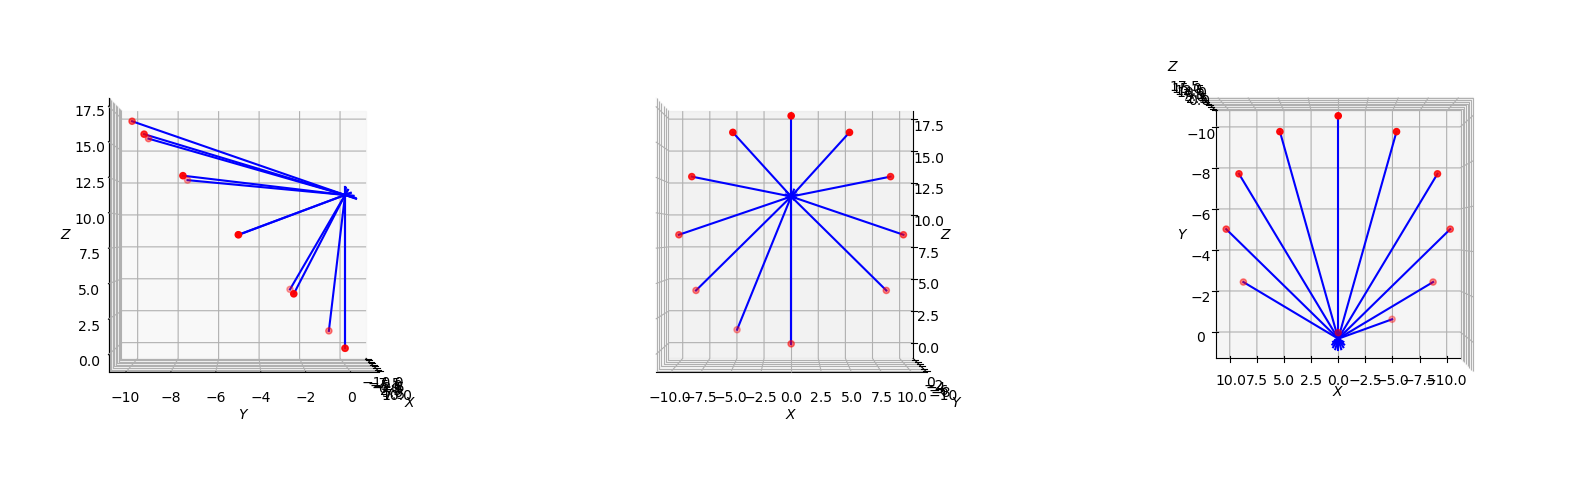

In [324]:
# Rt = Rt[:3]
X, Y, Z = Rt[:, 0, 3], Rt[:, 1, 3], Rt[:, 2, 3]
print(X, Y, Z)

unit_vecs = np.zeros((Rt.shape[0], 3, 1))
unit_vecs[:, 2] = 1
print(unit_vecs[0])
rot = Rt[:, :3, :3]

look_at = rot @ unit_vecs
look_at = look_at*12
print(look_at[0])

print(look_at.shape, X.shape, Y.shape, Z.shape)
# Plot X,Y,Z

fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter3D(X, Y, Z, c='red')
ax1.set_xlabel('$X$')
ax1.set_ylabel('$Y$')
ax1.set_zlabel('$Z$')
ax1.view_init(0, 0)

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter3D(X, Y, Z, c='red')
ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_zlabel('$Z$')
ax2.view_init(0, -90)

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter3D(X, Y, Z, c='red')
ax3.set_xlabel('$X$')
ax3.set_ylabel('$Y$')
ax3.set_zlabel('$Z$')
ax3.view_init(90, 90)

for idx in range(len(look_at)):
    ax1.plot3D([X[idx], X[idx] + look_at[idx][0]], 
               [Y[idx], Y[idx] + look_at[idx][1]],
               [Z[idx], Z[idx] + look_at[idx][2]], c='blue')
    ax2.plot3D([X[idx], X[idx] + look_at[idx][0]], 
               [Y[idx], Y[idx] + look_at[idx][1]],
               [Z[idx], Z[idx] + look_at[idx][2]], c='blue')
    ax3.plot3D([X[idx], X[idx] + look_at[idx][0]], 
               [Y[idx], Y[idx] + look_at[idx][1]],
               [Z[idx], Z[idx] + look_at[idx][2]], c='blue')
plt.show()
